In [3]:
# -*- coding: utf-8 -*-
"""
Created on Feb 12 00:34:32 2020

@author: zhujinhua
"""

import numpy as np

import pandas as pd


from wordcloud import WordCloud
import codecs
import jieba
import jieba.posseg as pseg
#import jieba.analyse as analyse
from scipy.misc import imread
import os
from os import path
import matplotlib.pyplot as plt
import time, json, requests

from PIL import Image, ImageDraw, ImageFont

url = 'https://pacaio.match.qq.com/virus/trackList?page=%d&num=10&&callback=__jp3'

#data = json.loads(requests.get(url=url%0).json()['data'])

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
jieba.load_userdict('D:\\app\\dataset\\nlp\\zjh\\THUOCL_diming.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\app\\dataset\\nlp\\zjh\\THUOCL_diming.txt'

In [18]:
str="动车D1234汽车X123高铁G1143（04车07A号）从湖北省赤壁北出发，10点55分到达长沙南，12点18分从长沙南乘坐高铁G2105（02车15A），15点10分到达凯里南，18点30分从凯里南乘坐高铁G2993（08车04F），18点53分到达贵定北。后由儿子江某开车接其回到贵定县金南街道庆熙社区锦江华府家中"
#jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\THUOCL_diming.txt')
'''jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\机构名词典.txt')
jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\全国地名大全.txt')
jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\现代汉语补充词库.txt')
jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\人名词典.txt')
jieba.load_userdict('D:\\app\\HanLP\\data\\dictionary\\zjh\\上海地名.txt')'''
s=jieba.lcut(str)
print(s)
s=jieba.cut(str)
pos=pseg.lcut(str)
print(s)
print(pos)

['动车', 'D1234', '汽车', 'X123', '高铁', 'G1143', '（', '04', '车', '07A', '号', '）', '从', '湖北省', '赤壁', '北', '出发', '，', '10', '点', '55', '分', '到达', '长沙', '南', '，', '12', '点', '18', '分从', '长沙', '南', '乘坐', '高铁', 'G2105', '（', '02', '车', '15A', '）', '，', '15', '点', '10', '分', '到达', '凯里', '南', '，', '18', '点', '30', '分从', '凯里', '南', '乘坐', '高铁', 'G2993', '（', '08', '车', '04F', '）', '，', '18', '点', '53', '分', '到达', '贵定', '北', '。', '后', '由', '儿子', '江某', '开车', '接其', '回到', '贵定县', '金南', '街道', '庆熙', '社区', '锦江', '华府', '家中']
<generator object Tokenizer.cut at 0x00000257151AF360>
[pair('动车', 'n'), pair('D1234', 'eng'), pair('汽车', 'n'), pair('X123', 'eng'), pair('高铁', 'n'), pair('G1143', 'eng'), pair('（', 'x'), pair('04', 'm'), pair('车', 'n'), pair('07', 'm'), pair('A', 'eng'), pair('号', 'm'), pair('）', 'x'), pair('从', 'p'), pair('湖北省', 'ns'), pair('赤壁', 'n'), pair('北', 'ns'), pair('出发', 'v'), pair('，', 'x'), pair('10', 'm'), pair('点', 'm'), pair('55', 'm'), pair('分', 'v'), pair('到达', 'v'), pair('长沙', 'ns'), 

In [93]:
time.strftime("%Y%m%d-%H%M%S")

'20200212-165723'

In [108]:
f=open('track'+time.strftime("%Y%m%d-%H%M%S")+'.txt','w',encoding='utf-8')
for i in range(1):
    print(i)
    rsp=requests.get(url=url%i)
    data=json.loads(rsp.text[6:-1])['data']
    updatetime=data['lasttime']
    reclist=data['list']
    #time.sleep(1)
    for rec in reclist:
        recstr=json.dumps(rec,ensure_ascii=False)
        f.write(recstr+'\n')
f.close()

0


In [24]:
file=open('track20200212-172919ok.txt','r',encoding='utf-8')
wordlist=[]
placelist=[]
gaotie=[]
try:
    text_lines = file.readlines()
    #print(type(text_lines), text_lines)
    for line in text_lines:
        #print(line)
        rec=json.loads(line)
        track=json.loads(rec['track'])
        #print(type(track))
        #print(track)
        strx=''
        for tm1 in track:
            strx+=','.join(tm1.values())
        
        wds=pseg.lcut(strx)
        n=[]
        ns=[]
        gt=[]
        for p in wds:
            if p.flag[0]=='n' or p.flag =='eng':
                n.append(p.word)
            if p.flag=='ns' or p.flag =='nrt' or p.flag=='nz':
                ns.append(p.word)
            if p.flag=='eng' and p.word!='XX':
                gt.append(p.word)
        wordlist.extend(n)
        placelist.extend(ns)
        gaotie.extend(gt)
        #print(wds)
finally:
    file.close()

print(len(wordlist))


67604


In [28]:
wordliststr = ' '.join(wordlist)
placeliststr=' '.join(placelist).replace('市','')
gaotiestr=' '.join(gaotie).replace('CT','').replace('KTV','')


'''for z in placelist:
    if z[:2]=='武汉':
        print(z)'''


"for z in placelist:\n    if z[:2]=='武汉':\n        print(z)"

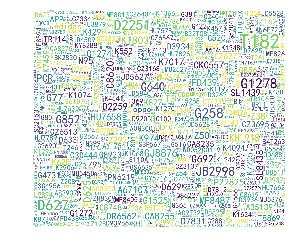

In [29]:
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path="simkai.ttf",
    width=1000, height=860, margin=2,
    #font_path=path.join(d,'simsun.ttc'),
    #设置背景色
    background_color='white',
    #词云形状
    #mask=color_mask,
    #允许最大词汇
    max_words=1000,
    collocations=False,
    #最大号字体
    max_font_size=80
)
word_cloud = cloud.generate(wordliststr) # 产生词云
word_cloud.to_file("nCov2019-noun.jpg") #保存图片
place_cloud = cloud.generate(placeliststr) # 产生词云
place_cloud.to_file("nCov2019-nounplace.jpg") #保存图片
gaotie_cloud = cloud.generate(gaotiestr) # 产生词云
gaotie_cloud.to_file("nCov2019-noungaotie.jpg") #保存图片
#  显示词云图片
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

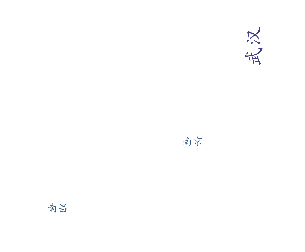

In [33]:
x = cloud.generate('武汉 南京,武汉,武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 武汉 南昌') # 产生词云
#word_cloud.to_file("nCov2019-noungaotie.jpg") #保存图片
#  显示词云图片
plt.imshow(x)
plt.axis('off')
plt.show()

In [28]:
json.loads(xx.text[6:-1])['data']

{'lasttime': '2020-02-11 23:25:31',
 'list': [{'confid': '26-58',
   'province': '贵州省',
   'city': '黔南布依族苗族自治州',
   'county': '贵定县',
   'user_num': '',
   'user_name': '江某某',
   'other_info': '男，64 岁（又有通报 65 岁），湖北赤壁市常住人口。',
   'track': '[{"time":"1月16日","action":"乘坐高铁G1143（04车07A号）从湖北省赤壁北出发，10点55分到达长沙南，12点18分从长沙南乘坐高铁G2105（02车15A），15点10分到达凯里南，18点30分从凯里南乘坐高铁G2993（08车04F），18点53分到达贵定北。后由儿子江某开车接其回到贵定县金南街道庆熙社区锦江华府家中"},{"time":"1月17日","action":"下午16点到贵定县新港百货超市购物后回家"},{"time":"1月18日","action":"中午到老二医吃麻辣烫后回家"},{"time":"1月20日","action":"上午9点到达西门坡赶集，10点30分买菜后回家；下午13点10分出门，到惠民小区廉租房串门，16点50分回到家中"},{"time":"1月21日","action":"上午9点到自来水公司旁早餐店购买早餐，9点20分进入新港百货超市后回家"},{"time":"1月26日","action":"上午10点出门到小十字至大同路街边买菜"},{"time":"1月28日","action":"上午9点到三鲜堂瓮安辣鸡粉吃早餐后回家"},{"time":"2月4日","action":"由急救车接至贵定县中医院进行肺部扫描，随即到县定点医院进行隔离治疗"},{"time":"2月5日","action":"核酸检测为阳性"},{"time":"2月7日","action":"转至贵阳定点医院治疗，目前病情平稳。"}]',
   'target': '',
   'pub_time': '2020-02-11 00:00:00',
   'source': '多彩贵州网',
   'source_url': 'https://

In [150]:
text = '新疆中心小学，简称“新小”，位于新疆'
jiagu.knowledge(text)

[]